<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [5]:
class LinearLayer():
  # 학습파라미터 설정 w,b 의 shape는 인풋과 아웃풋에 의해 정해진다.
  def __init__(self, d_in, d_out):
    W_shape = (d_in, d_out)
    B_shape = (d_out)

    # 행렬 만들기
    self.W = np.random.normal(0,1, W_shape) # 정규분포를 따르는 랜덤값 생성(평균 0, 표준편차 1)
    self.B = np.zeros(B_shape) # Bias 는 덧셈해주는 값. 디폴트 값을 0

  def forward(self, X):
    # X : (n_sample, d_in)
    return X@self.W + self.B
layer1 = LinearLayer(d_in = 3, d_out = 3)
layer2 = LinearLayer(d_in = 3, d_out = 2)
print(layer1.W, layer1.B)
print(layer2.W, layer2.B)
X = np.array([[1, 2, 1]])
print(f'X: {X} shape: {X.shape}')
print(f'첫번째 레이어 계산결과: { layer1.forward(X) }')
print(f'두번째 레이어 계산결과: { layer2.forward(layer1.forward(X)) }')

[[ 1.9166126   0.0727731   2.03713949]
 [ 1.5236519  -1.92876913 -0.05515307]
 [ 1.01107759 -0.42076907  0.67470128]] [0. 0. 0.]
[[ 1.52179636  1.85380577]
 [-0.11931202  0.96760605]
 [ 0.14615176 -0.08871171]] [0. 0.]
X: [[1 2 1]] shape: (1, 3)
첫번째 레이어 계산결과: [[ 5.97499399 -4.20553423  2.60153463]]
두번째 레이어 계산결과: [[9.97471374 6.77639136]]


In [6]:
class Model():
  def __init__(self):
    self.layer1 = LinearLayer(d_in = 3, d_out = 3)
    self.layer2 = LinearLayer(d_in = 3, d_out = 2)

  def predict(self, x):
    z = self.layer1.forward(x)
    y = self.layer2.forward(z)
    return y
  
  # 학습파라미터를 반환하는 함수
  def get_weights(self):
    return [self.layer1.W, self.layer1.B, self.layer2.W, self.layer2.B]

  # 학습파라미터를 직접 정해주는 함수
  def set_weights(self, new_weight_list):
    self.layer1.W = new_weight_list[0]
    self.layer1.B = new_weight_list[1]
    self.layer2.W = new_weight_list[2]
    self.layer2.B = new_weight_list[3]

* 모델 불러오기

In [7]:
model = Model()
model.predict(X)

array([[8.42657598, 0.93048615]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [8]:
X = np.array([[1, 2, 1]])
W1_ = np.array([1,1,-1,1,0.5,-1,1,1,1]).reshape(3,3)
B1_ = np.array([0,0,0]).reshape(1,3)
W2_ = np.array([1,0.5,-1,0.5,0,1]).reshape(3,2)
B2_ = np.array([1, -0.5]).reshape(1,2)

print(f'{X} X shape: {X.shape}')
print(f'{W1_} W1 shape: {W1_.shape}')
print(f'{B1_} B1 shape: {B1_.shape}')
print(f'{W2_} W2 shape: {W2_.shape}')
print(f'{B2_} B2 shape: {B2_.shape}')

[[1 2 1]] X shape: (1, 3)
[[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]] W1 shape: (3, 3)
[[0 0 0]] B1 shape: (1, 3)
[[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]] W2 shape: (3, 2)
[[ 1.  -0.5]] B2 shape: (1, 2)


* 학습 파라미터 확인

In [9]:
model.get_weights()

[array([[-0.87551565,  0.27646454,  0.30428114],
        [ 0.69888651,  0.91192104,  0.81835272],
        [ 0.65566066,  1.13134598,  0.31877531]]),
 array([0., 0., 0.]),
 array([[ 0.77122882, -1.23867454],
        [ 0.20168362,  0.41931451],
        [ 3.03853264,  0.45777583]]),
 array([0., 0.])]

* 학습 파라미터 세팅

In [10]:
model.set_weights([W1_, B1_, W2_, B2_])
model.get_weights()

[array([[ 1. ,  1. , -1. ],
        [ 1. ,  0.5, -1. ],
        [ 1. ,  1. ,  1. ]]), array([[0, 0, 0]]), array([[ 1. ,  0.5],
        [-1. ,  0.5],
        [ 0. ,  1. ]]), array([[ 1. , -0.5]])]

* 예측 (순전파)

In [11]:
model.predict(X)

array([[2., 1.]])

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
- Step Function # 예외(쓰이지 않음)
- Sigmoid : 예측 결과가 두개중 하나
- Softmax : 예측 결과가 세개 이상 클래스 중 하나
만약 마지막층에서 활성화 안쓰면 회귀
_________마지막층 사용_____
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
______ 중간층 사용_______
중간층에서 사용될 때는 gradient(미분) 값이 중요
```


* 시각화를 위한 플롯팅 함수

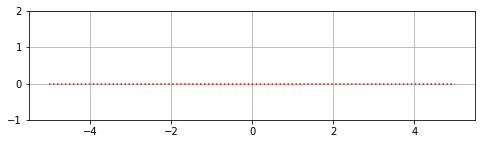

In [2]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.grid()

plot_func(xs=[1], ys=[1])

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [12]:
# 함수의 인풋, 아웃풋이 숫자 하나 : 0차 텐서
def sigmoid(x):
  return 1/(1+np.exp(-x))

sigmoid(5)

0.9933071490757153

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [13]:
def sigmoid_grad(x):
  return sigmoid(x)*(1-sigmoid(x))

sigmoid_grad(1)

0.19661193324148185

* 시각화

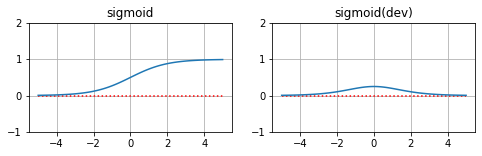

In [14]:
# xs = np.array([-2, -1, 0, 1, 2])
xs = np.linspace(-5, 5, 100) # -5 부터 5 까지 100개의 숫자
plt.subplot(121); plot_func(xs, sigmoid(xs), title = 'sigmoid')
plt.subplot(122); plot_func(xs, sigmoid_grad(xs), title = 'sigmoid(dev)')



**Sigmoid 소개**

```
- # 나오게 된 배경 : 정규분포를 해석하기 위해서 나왔다.
- # 장단점 : 기울기가 급격히 변화해 발생하는 기울기 폭주를 막을수 있다. 하지만 기울기 소실등 기울기를 제대로 찾지못해 학습효율성이 감소한다는 단점을 지닌다.
- # 특징 정리 (출력 범위: 0~1, 미분 값: 0.25, 0보다 작은값에서 볼록, 0보다 큰값에서 오목함)
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [15]:
# 함수의 인풋, 아웃풋이 1차 텐서 
def softmax(xs):
  exs = np.exp(xs) # [np.exp(1), np.exp(2), np.exp(1)]
  sum_exs = np.sum(exs) # np.exp(1) + np.exp(2) + np.exp(3) # 0차 텐서
  return exs / sum_exs # np.exp(1)/sum.exs, np.exp(2)/sum.exs, np.exp(3)/sum.exs
# 아웃풋 요소들은 0~1 의 값이고 다 더하면 1이된다.

softmax(np.array([1,2,1,1]))

array([0.1748777 , 0.47536689, 0.1748777 , 0.1748777 ])

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [16]:
# 예측 [0.7, 0.2, 0.1] 실제 [1, 0, 0] -> 0번째 클래스가 정답(j=0)
# 미분 -> [0.7 * softmax([1, 2, 1])]
def softmax_grad(xs, j = 0):
  return (softmax(xs) * (1-softmax(xs)) )[j]
  
softmax_grad(np.array([0.7, 0.2, 0.1]))

0.24870136547595253

* 시각화


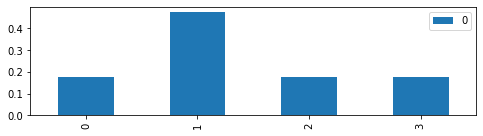

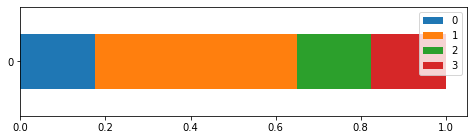

In [17]:
ys = softmax(np.array([1,2,1,1]))
pd.DataFrame(ys).plot(kind='bar')
pd.DataFrame([ys]).plot(kind='barh', stacked = True)

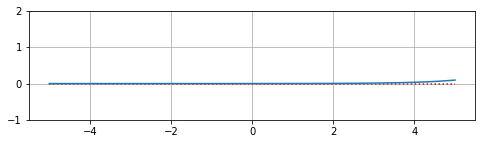

In [20]:
plot_func(xs, softmax(xs))


**Softmax 소개**

```
- # 나오게 된 배경 : 시그모이드와 비슷하지만 이진분류가 아닌 다중분류를 위해 고안된 함수다.
- # 장단점 : 확률 총합이 1이기 때문에 어떤 분류에 속할 확률이 높은지 쉽게 인지 가능하다. 하지만 지나치게 큰 값이 들어갈 경우 값이 너무커서 연산이 되지 않는 오버플로 문제를 일이킬 수 도 있다.
- # 특징 정리 (출력 범위 : 0~1 사이의 확률값을 가진다, 미분 값 : 1차, 모든값의 합은 1이다. )
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [18]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

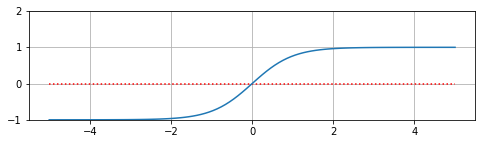

In [19]:
plot_func(xs, tanh(xs))

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [ ]:
def tanh_grad(xs):
  return (1-tanh(xs)**2)

* 시각화

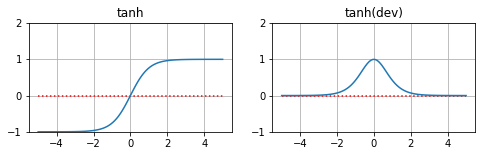

In [ ]:
plt.subplot(121); plot_func(xs, tanh(xs), title = 'tanh')
plt.subplot(122); plot_func(xs, tanh_grad(xs), title = 'tanh(dev)')


**Tanh 소개**

```
- # 나오게 된 배경 : 시그모이드 함수의 단점을 보완해서 나온 함수다.
- # 장단점 : 기울기가 양수 음수 모두 나올수 있기 때문에 시그모이드 보다 학습효율성이 뛰어나고 출력값의 변화폭이 크기 때문에 기울기소실 현상이 적은 편이다. 하지만 시그모이드 보다 범위가 넓다 뿐이지 그 구간이 크지는 않으므로 x가 -5보다 작고 5보다 클 경우 기울기소실 현상문제는 여전히 존재함
- # 특징 정리 (출력 범위 : -1~1, 미분 값 : 1, 시그모이드와 비슷하지만 최소범위가 -1로 확장되면서 출력범위가 넓어지고 경사면이 큰범위가 더 크기때문에 빠르게 수렴하여 학습할 수 있다. )
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

In [ ]:
def relu(x):
  return np.maximum(0,x)

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [ ]:
def relu_grad(x):
  return np.where(x >= 0, 1, 0)

* 시각화

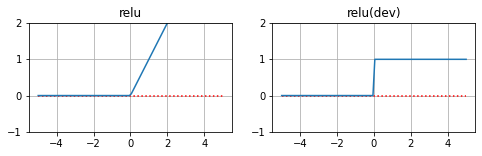

In [ ]:
plt.subplot(121); plot_func(xs, relu(xs), title = 'relu')
plt.subplot(122); plot_func(xs, relu_grad(xs), title = 'relu(dev)')



**ReLU 소개**

```
- # 나오게 된 배경 : 시그모이드의 기울기 소실 문제를 해결하기 위해 고안되었던 함수들 중 하나이다.
- # 장단점 : 다른 함수에 비해 학습속도가 매우빠르고 이전 함수에서 보았던 기울기소실 문제가 발생하지 않는다.하지만 음수가 들어가면 모두 0을 출력하기 때문에 가중치 업데이트가 안되는 현상이 발생할 수 도 있다.
- # 특징 정리 (출력 범위 : 0<=x, 미분 값 = 1, 비선형 효과에 대한 모델설명 가능 )
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

In [ ]:
def prelu(x, alpha = 0.01):
  return np.maximum(alpha * x, x)

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [ ]:
def prelu_grad(x, alpha = 0.01):
  return np.where(x >=0, 1, alpha)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

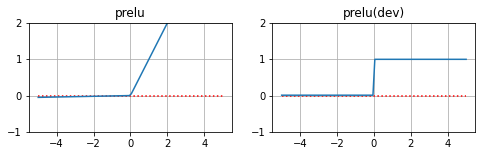

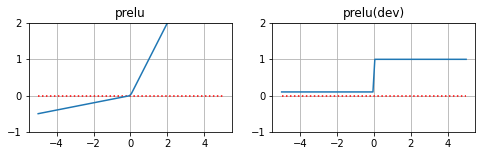

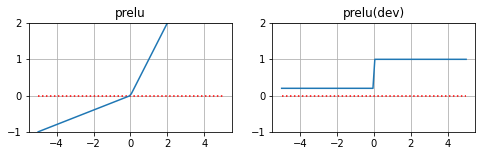

In [ ]:
for alpha in [0.01, 0.1, 0.2]:
  plt.subplot(121); plot_func(xs, prelu(xs, alpha = alpha), title = 'prelu')
  plt.subplot(122); plot_func(xs, prelu_grad(xs, alpha = alpha), title = 'prelu(dev)')
  plt.show()



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경 : ReLU의 단점중 하나인 음수를 넣었을때 기울기가 모두 0이 된다는 점을 해결하기 위해 고안된 함수다.
- # 장단점 : 음수 범위에서의 한계를 극복하긴 했지만 음수에서 선형성이 생기고 그로인해 복잡한 분류에서 사용할 수 없다는 단점이 있다.
- # 특징 정리 (출력 범위 : 0<=x, 미분 값 : 1, ReLU의 변형 함수 alpha 라는 파라미터를 이용해 0보다 작은 입력에 대해 기울기를 준 경우이다. )
- # 알파 값은 보통 어떻게 정해지는가? : 목표로 구하는 값에 따라서 알파값을 정해준다.
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [ ]:
def elu(x, alpha = 1):
  return np.where(x>=0, x, alpha*(np.exp(x)-1) )

* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [ ]:
def elu_grad(x, alpha = 1):
  return np.where(x>=0, 1, alpha*np.exp(x) )

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

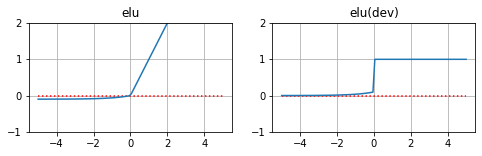

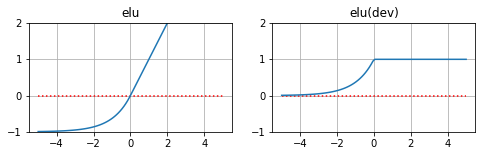

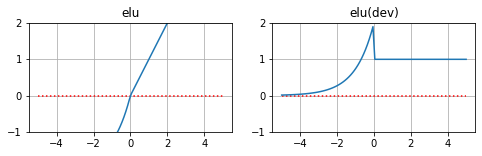

In [ ]:
for alpha in (0.1, 1, 2):
  plt.subplot(121); plot_func(xs, elu(xs, alpha = alpha), title = 'elu')
  plt.subplot(122); plot_func(xs, elu_grad(xs, alpha = alpha), title = 'elu(dev)')
  plt.show()



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경 : 각져 있는 ReLU함수를 exp를 사용해 부드러운 곡선형태로 만든것이다.
- # 장단점 : 비선형적이기 때문에 복잡한 분류에서도 사용가능하다. 그러나 ReLU에 비해 크게 성능이 증가하지는 않았고 exp의 존재로 연산량이 많아서 ReLU에 비해 느리다.
- # 특징 정리 (alpha 값에 따라서 출력값의 범위가 달라진다. 곡선형태를 취하기 때문에 미분시 끊어지는 부분이 없다.)
- # 알파 값은 보통 어떻게 정해지는가? : 알파값은 상황에 따라 바뀌긴 하지만 출력하려는 범위와 구하는 값의 특징으로 고려해 그래프를 확인하며 알파값을 구해야 한다.
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```
1. 신경망 아래쪽으로 갈수록 그레디언트가 작아지거나 소실되는 경우가 생긴다. 이것을 그레디언트 소실이라 부른다.

2. 그레디언트를 이용해 오차를 구할수 있고, 오차는 딥러닝을 실행하는 아주 중요한 요소다. 성능과 더불어 예측값의 정확도를 올리는 요소기 때문이다.

3. 하이퍼볼릭 탄젠트(Tanh), ReLU 활성화 함수


```